In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [27]:
# Load the data
data = pd.read_csv('Compiled.csv', parse_dates=['datetime'])

# Split data into features (exogenous variables) and target (load)
features = data.drop(['datetime', 'load'], axis=1)
test_target = data['load']

# Split data into training and testing sets
#train_size = int(0.8 * len(data))
#train_features, test_features = features[:train_size], features[train_size:]
#train_target, test_target = target[:train_size], target[train_size:]

In [16]:
def replace_with_first_48_rows(column):
    first_value = None
    for i, value in enumerate(column):
        if i % 48 == 0:
            first_value = value
        column[i] = first_value
    return column

In [17]:
naive_forecast = replace_with_first_48_rows(test_target)

C:\Users\ajsaw\AppData\Local\Temp\ipykernel_20460\3943930353.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[i] = first_value


In [29]:
naive_forecast

0        1031471.628
1        1031471.628
2        1031471.628
3        1031471.628
4        1031471.628
            ...     
33595     991623.932
33596     991623.932
33597     991623.932
33598     991623.932
33599     991623.932
Name: load, Length: 33600, dtype: float64

In [25]:
seasonal_forecast_daily

0                NaN
1                NaN
2                NaN
3                NaN
4                NaN
            ...     
33595    1137035.432
33596    1106097.932
33597    1076111.932
33598    1044110.932
33599    1011590.932
Name: load, Length: 33600, dtype: float64

In [10]:
# Naive forecasting
#naive_forecast = test_target.shift(1)

# Seasonal naive forecasting
seasonal_forecast_daily = test_target.shift(24)  # Shift by 168 hours
seasonal_forecast_weekly = test_target.shift(168)  # Shift by 168 hours
seasonal_forecast_yearly = test_target.shift(8760)  # Shift by 168 hours

# Random walk with drift forecasting
#random_walk_forecast = test_target.shift(1) + (test_target.iloc[0] - train_target.iloc[-1])

In [11]:
test_target

0        1.031472e+06
1        1.007206e+06
2        9.861084e+05
3        9.707610e+05
4        9.622584e+05
             ...     
33595    1.141079e+06
33596    1.108896e+06
33597    1.078978e+06
33598    1.044495e+06
33599    1.010234e+06
Name: load, Length: 33600, dtype: float64

In [30]:
error_measures = {
    'MAE': [mean_absolute_error(test_target[1:], naive_forecast[1:]),
            mean_absolute_error(test_target[24:], seasonal_forecast_daily[24:]),
            mean_absolute_error(test_target[168:], seasonal_forecast_weekly[168:]),
            mean_absolute_error(test_target[8760:], seasonal_forecast_yearly[8760:])],
#            mean_absolute_error(test_target[1:], random_walk_forecast[1:])],
    'MSE': [mean_squared_error(test_target[1:], naive_forecast[1:]),
            mean_squared_error(test_target[24:], seasonal_forecast_daily[24:]),
            mean_squared_error(test_target[168:], seasonal_forecast_weekly[168:]),
            mean_squared_error(test_target[8760:], seasonal_forecast_yearly[8760:])],
#            mean_squared_error(test_target[1:], random_walk_forecast[1:])],
    'RMSE': [np.sqrt(mean_squared_error(test_target[1:], naive_forecast[1:])),
             np.sqrt(mean_squared_error(test_target[24:], seasonal_forecast_daily[24:])),
             np.sqrt(mean_squared_error(test_target[168:], seasonal_forecast_weekly[168:])),
             np.sqrt(mean_squared_error(test_target[8760:], seasonal_forecast_yearly[8760:]))],
#             np.sqrt(mean_squared_error(test_target[1:], random_walk_forecast[1:]))],
    'MAPE': [np.mean(np.abs((test_target[1:] - naive_forecast[1:]) / test_target[1:])) * 100,
             np.mean(np.abs((test_target[168:] - seasonal_forecast_daily[24:]) / test_target[24:])) * 100,
             np.mean(np.abs((test_target[168:] - seasonal_forecast_weekly[168:]) / test_target[168:])) * 100,
             np.mean(np.abs((test_target[168:] - seasonal_forecast_yearly[8760:]) / test_target[8760:])) * 100]
#             np.mean(np.abs((test_target[1:] - random_walk_forecast[1:]) / test_target[1:])) * 100],
    #'SMAPE': [np.mean(2 * np.abs(test_target[1:] - naive_forecast[1:]) /
    #                  (test_target[1:] + naive_forecast[1:])) * 100,
    #          np.mean(2 * np.abs(test_target[168:] - seasonal_forecast[168:]) /
    #                  (test_target[168:] + seasonal_forecast[168:])) * 100,
    #          np.mean(2 * np.abs(test_target[1:] - random_walk_forecast[1:]) /
    #                  (test_target[1:] + random_walk_forecast[1:])) * 100],
    #'MASE': [mean_absolute_error(test_target[1:], naive_forecast[1:]) /
    #         mean_absolute_error(test_target[1:], test_target.shift(1)[1:]),
    #         mean_absolute_error(test_target[168:], seasonal_forecast[168:]) /
    #         mean_absolute_error(test_target[168:], test_target.shift(168)[168:]),
    #         mean_absolute_error(test_target[1:], random_walk_forecast[1:]) /
    #         mean_absolute_error(test_target[1:], test_target.shift(1)[1:])]
}

# Create a DataFrame to display error measures
error_df = pd.DataFrame(error_measures, index=['Naive', 'Seasonal Naive (daily)','Seasonal Naive (weekly)', 'Seasonal Naive (yearly)'])

error_df


,MAE,MSE,RMSE,MAPE
Naive,123233.370454,2.837943e+10,168461.966957,9.809409
Seasonal Naive (daily),53567.923650,8.319304e+09,91210.219837,4.505770
Seasonal Naive (weekly),36635.161232,3.236422e+09,56889.561328,3.160913
Seasonal Naive (yearly),100568.695462,1.951730e+10,139704.336947,8.807138


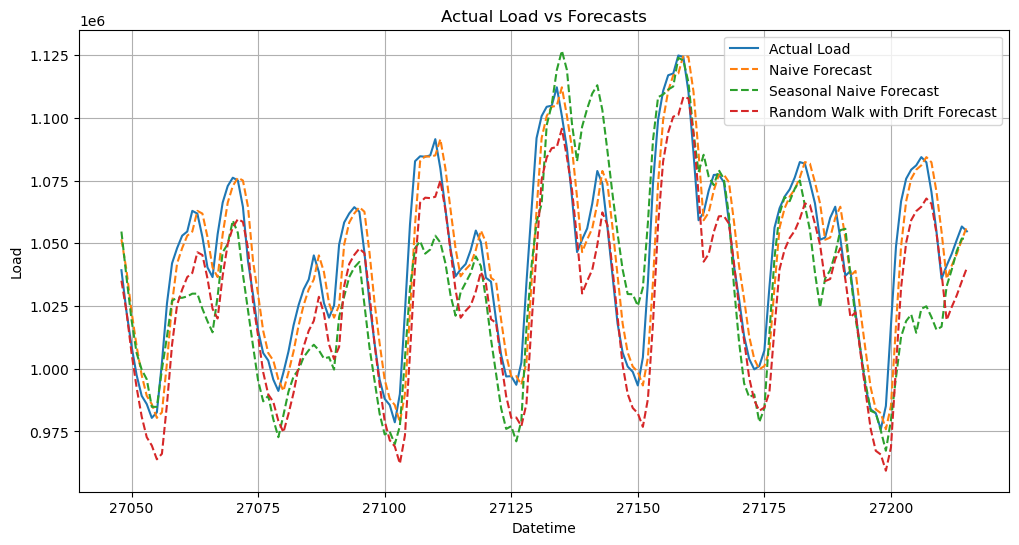

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(test_target.index[168:336], test_target[168:336], label='Actual Load')
plt.plot(test_target.index[168:336], naive_forecast[168:336], label='Naive Forecast', linestyle='dashed')
plt.plot(test_target.index[168:336], seasonal_forecast[168:336], label='Seasonal Naive Forecast', linestyle='dashed')
plt.plot(test_target.index[168:336], random_walk_forecast[168:336], label='Random Walk with Drift Forecast', linestyle='dashed')
plt.xlabel('Datetime')
plt.ylabel('Load')
plt.title('Actual Load vs Forecasts')
plt.legend()
plt.grid()
plt.show()